# A PROJECT TO COMPARE FANDANGO MOVIE RATINGS BETWEEN 2015 & 2016 
## Checking for biases in the rating system following Hickey's analysis.

###### Getting Started: Importing Data and Laying the Groundwork

In [5]:
import numpy as np
import pandas as pd

###### Reading both rating datasets and displaying data structure

In [6]:
fan = pd.read_csv('fandango_score_comparison.csv')

In [7]:
fan.head()

,FILM,RottenTomatoes,RottenTomatoes_User,Metacritic,Metacritic_User,IMDB,Fandango_Stars,Fandango_Ratingvalue,RT_norm,RT_user_norm,...,IMDB_norm,RT_norm_round,RT_user_norm_round,Metacritic_norm_round,Metacritic_user_norm_round,IMDB_norm_round,Metacritic_user_vote_count,IMDB_user_vote_count,Fandango_votes,Fandango_Difference
0,Avengers: Age of Ultron (2015),74,86,66,7.1,7.8,5.0,4.5,3.70,4.3,...,3.90,3.5,4.5,3.5,3.5,4.0,1330,271107,14846,0.5
1,Cinderella (2015),85,80,67,7.5,7.1,5.0,4.5,4.25,4.0,...,3.55,4.5,4.0,3.5,4.0,3.5,249,65709,12640,0.5
2,Ant-Man (2015),80,90,64,8.1,7.8,5.0,4.5,4.00,4.5,...,3.90,4.0,4.5,3.0,4.0,4.0,627,103660,12055,0.5
3,Do You Believe? (2015),18,84,22,4.7,5.4,5.0,4.5,0.90,4.2,...,2.70,1.0,4.0,1.0,2.5,2.5,31,3136,1793,0.5
4,Hot Tub Time Machine 2 (2015),14,28,29,3.4,5.1,3.5,3.0,0.70,1.4,...,2.55,0.5,1.5,1.5,1.5,2.5,88,19560,1021,0.5


In [8]:
rating = pd.read_csv('movie_ratings_16_17.csv')

In [9]:
rating.head()

,movie,year,metascore,imdb,tmeter,audience,fandango,n_metascore,n_imdb,n_tmeter,n_audience,nr_metascore,nr_imdb,nr_tmeter,nr_audience
0,10 Cloverfield Lane,2016,76,7.2,90,79,3.5,3.80,3.60,4.50,3.95,4.0,3.5,4.5,4.0
1,13 Hours,2016,48,7.3,50,83,4.5,2.40,3.65,2.50,4.15,2.5,3.5,2.5,4.0
2,A Cure for Wellness,2016,47,6.6,40,47,3.0,2.35,3.30,2.00,2.35,2.5,3.5,2.0,2.5
3,A Dog's Purpose,2017,43,5.2,33,76,4.5,2.15,2.60,1.65,3.80,2.0,2.5,1.5,4.0
4,A Hologram for the King,2016,58,6.1,70,57,3.0,2.90,3.05,3.50,2.85,3.0,3.0,3.5,3.0


###### Data Preparation:

##### Creating subsets of the data with only the relevant columns for analysis.

In [10]:
previousrate_fan = fan[['FILM', 'Fandango_Stars', 'Fandango_Ratingvalue', 'Fandango_votes', 'Fandango_Difference']].copy()
afterrate_rating = rating[['movie','year','fandango']].copy()

In [11]:
previousrate_fan.head()

,FILM,Fandango_Stars,Fandango_Ratingvalue,Fandango_votes,Fandango_Difference
0,Avengers: Age of Ultron (2015),5.0,4.5,14846,0.5
1,Cinderella (2015),5.0,4.5,12640,0.5
2,Ant-Man (2015),5.0,4.5,12055,0.5
3,Do You Believe? (2015),5.0,4.5,1793,0.5
4,Hot Tub Time Machine 2 (2015),3.5,3.0,1021,0.5


In [12]:
afterrate_rating.head()

,movie,year,fandango
0,10 Cloverfield Lane,2016,3.5
1,13 Hours,2016,4.5
2,A Cure for Wellness,2016,3.0
3,A Dog's Purpose,2017,4.5
4,A Hologram for the King,2016,3.0


##### Year Extraction for comparison:

###### Extracts the year from the film titles using string slicing.

In [13]:
previousrate_fan['Year'] = previousrate_fan['FILM'].str[-5:-1]
previousrate_fan.head(2)

,FILM,Fandango_Stars,Fandango_Ratingvalue,Fandango_votes,Fandango_Difference,Year
0,Avengers: Age of Ultron (2015),5.0,4.5,14846,0.5,2015
1,Cinderella (2015),5.0,4.5,12640,0.5,2015


##### Data Filtering:

In [14]:
previousrate_fan['Year'].value_counts()

Year
2015    129
2014     17
Name: count, dtype: int64

###### Creating separate dataframes for 2015 and 2016 data.

In [15]:
fan_2015 = previousrate_fan[previousrate_fan['Year'] == '2015'].copy()
fan_2015['Year'].value_counts()                       

Year
2015    129
Name: count, dtype: int64

In [16]:
afterrate_rating.head(2)

,movie,year,fandango
0,10 Cloverfield Lane,2016,3.5
1,13 Hours,2016,4.5


In [17]:
afterrate_rating['year'].value_counts()

year
2016    191
2017     23
Name: count, dtype: int64

In [18]:
rating_2016 = afterrate_rating[afterrate_rating['year'] == 2016].copy()
rating_2016['year'].value_counts()

year
2016    191
Name: count, dtype: int64

# Comparing Distribution Shapes for 2015 and 2016

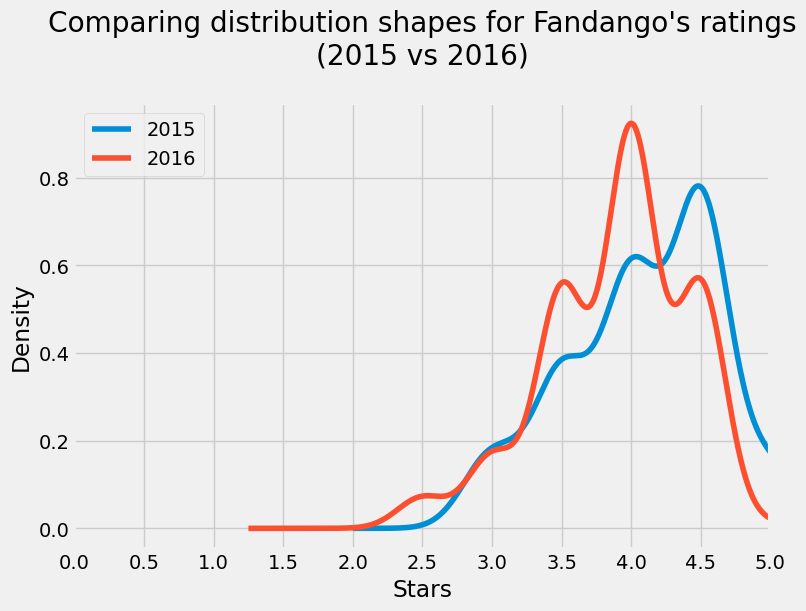

In [19]:
import matplotlib.pyplot as plt
from numpy import arange
%matplotlib inline
plt.style.use('fivethirtyeight')

fan_2015['Fandango_Stars'].plot.kde(label = '2015', legend = True, figsize = (8,5.5))
rating_2016['fandango'].plot.kde(label = '2016', legend = True)

plt.title("Comparing distribution shapes for Fandango's ratings\n(2015 vs 2016)",
          y = 1.07) # the `y` parameter pads the title upward
plt.xlabel('Stars')
plt.xlim(0,5) # because ratings start at 0 and end at 5
plt.xticks(arange(0,5.1,.5))
plt.show()

This plot displays two kernel density estimates that compare the rating distributions for 2015 and 2016. Both distributions are left-skewed, indicating a higher frequency of high ratings than low ratings. The 2016 distribution, shown in red, is slightly shifted to the left compared to the 2015 distribution, which is depicted in blue. The x-axis represents star ratings ranging from 0 to 5, while the y-axis illustrates the density of ratings.

In [20]:
print('2015' + '\n' + '-' * 16) # To help us distinguish between the two tables immediately and
                                # avoid silly mistakes as we read to and fro
fan_2015['Fandango_Stars'].value_counts(normalize = True).sort_index() * 100

2015
----------------


Fandango_Stars
3.0     8.527132
3.5    17.829457
4.0    28.682171
4.5    37.984496
5.0     6.976744
Name: proportion, dtype: float64

In [21]:
rating.head()

,movie,year,metascore,imdb,tmeter,audience,fandango,n_metascore,n_imdb,n_tmeter,n_audience,nr_metascore,nr_imdb,nr_tmeter,nr_audience
0,10 Cloverfield Lane,2016,76,7.2,90,79,3.5,3.80,3.60,4.50,3.95,4.0,3.5,4.5,4.0
1,13 Hours,2016,48,7.3,50,83,4.5,2.40,3.65,2.50,4.15,2.5,3.5,2.5,4.0
2,A Cure for Wellness,2016,47,6.6,40,47,3.0,2.35,3.30,2.00,2.35,2.5,3.5,2.0,2.5
3,A Dog's Purpose,2017,43,5.2,33,76,4.5,2.15,2.60,1.65,3.80,2.0,2.5,1.5,4.0
4,A Hologram for the King,2016,58,6.1,70,57,3.0,2.90,3.05,3.50,2.85,3.0,3.0,3.5,3.0


Two aspects are interesting in the figure above:
* Both distributions are strongly left-skewed.
* The 2016 distribution is slightly shifted to the left relative to the 2015 distribution.

The left skew suggests that movies on Fandango are given mostly high and very high fan ratings. Coupled with the fact that Fandango sells tickets, the high ratings are a bit dubious. It'd be really interesting to investigate this further — ideally in a separate project, since this is irrelevant for the current goal of our analysis.

The slight left shift of the 2016 distribution is interesting for our analysis. It shows that ratings were slightly lower in 2016 compared to 2015. This suggests that there was a difference indeed between Fandango's ratings for popular movies in 2015 and Fandango's ratings for popular movies in 2016. We can also see the difference in direction: the ratings in 2016 were slightly lower compared to 2015.


# Comparing Relative Frequencies

We're following a good thread so far, but we need to analyze more granular information. Let's examine the frequency tables of the two distributions to analyze some numbers. Because the datasets have different numbers of movies, we normalize the tables and show percentages instead.

In [22]:
print('2016' + '\n' + '-' * 16) # To help us distinguish between the two tables immediately and
                                # avoid silly mistakes as we read to and fro
rating_2016['fandango'].value_counts(normalize = True).sort_index() * 100

2016
----------------


fandango
2.5     3.141361
3.0     7.329843
3.5    24.083770
4.0    40.314136
4.5    24.607330
5.0     0.523560
Name: proportion, dtype: float64

In 2016, very high ratings (4.5 and 5 stars) had significantly lower percentages compared to 2015. In 2016, under 1% of the movies had a perfect rating of 5 stars, compared to 2015 when the percentage was close to 7%. Ratings of 4.5 were also more popular in 2015 — there were approximately 13% more movies rated with a 4.5 in 2015 compared to 2016.

The minimum rating is also lower in 2016 — 2.5 instead of 3 stars, the minimum of 2015. There is a difference between the two frequency distributions.

For some other ratings, the percentage went up in 2016. There was a greater percentage of movies in 2016 that received 3.5 and 4 stars, compared to 2015. 3.5 and 4.0 are high ratings, and this challenges the direction of the change we saw on the kernel density plots.

# Determining the Direction of the Change

Let's take a couple of summary metrics for more precise information about the direction of the change. In what follows, we'll compute the mean, the median, and the mode for both distributions and then we'll use a bar graph to plot the values.

In [23]:
mean_2015 = fan_2015['Fandango_Stars'].mean()
mean_2016 = rating_2016['fandango'].mean()

median_2015 = fan_2015['Fandango_Stars'].median()
median_2016 = rating_2016['fandango'].median()

mode_2015 = fan_2015['Fandango_Stars'].mode()[0] # the output of Series.mode() is a bit uncommon
mode_2016 = rating_2016['fandango'].mode()[0]

summary = pd.DataFrame()
summary['2015'] = [mean_2015, median_2015, mode_2015]
summary['2016'] = [mean_2016, median_2016, mode_2016]
summary.index = ['mean', 'median', 'mode']
summary

,2015,2016
mean,4.085271,3.887435
median,4.000000,4.000000
mode,4.500000,4.000000


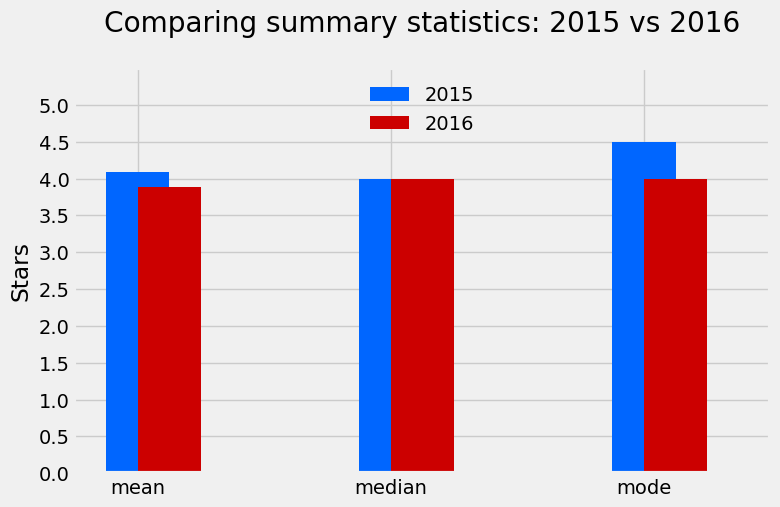

In [24]:
plt.style.use('fivethirtyeight')
summary['2015'].plot.bar(color = '#0066FF', align = 'center', label = '2015', width = .25)
summary['2016'].plot.bar(color = '#CC0000', align = 'edge', label = '2016', width = .25,
                         rot = 0, figsize = (8,5))

plt.title('Comparing summary statistics: 2015 vs 2016', y = 1.07)
plt.ylim(0,5.5)
plt.yticks(arange(0,5.1,.5))
plt.ylabel('Stars')
plt.legend(framealpha = 0, loc = 'upper center')
plt.show()

This plot presents a side-by-side comparison of the mean, median, and mode for two years: 2015 and 2016. The data is represented with blue bars for 2015 and red bars for 2016. 

Key observations include:

- The mean rating decreased from approximately 4.1 in 2015 to about 3.9 in 2016.
- The median rating remained constant at 4.0 for both years.
- The mode rating decreased from 4.5 in 2015 to 4.0 in 2016.

The Y-axis displays star ratings ranging from 0 to 5.5, clearly showing the downward shift in ratings from 2015 to 2016.

Overall, the visualizations effectively illustrate that, while the changes were not dramatic, there was a consistent pattern of slightly lower ratings in 2016 compared to 2015, particularly for the highest ratings (4.5 to 5 stars). The stylistic choices, including colors, spacing, and labels, enhance clarity and make comparisons easy to interpret.

The mean rating was lower in 2016 with approximately 0.2. This means a drop of almost 5% relative to the mean rating in 2015.

In [25]:
(summary.loc['mean'][0] - summary.loc['mean'][1]) / summary.loc['mean'][0]

C:\Users\Tobi\AppData\Local\Temp\ipykernel_26320\2228965407.py:1: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  (summary.loc['mean'][0] - summary.loc['mean'][1]) / summary.loc['mean'][0]


0.04842683568951993

While the median is the same for both distributions, the mode is lower in 2016 by 0.5. Coupled with what we saw for the mean, the direction of the change we saw on the kernel density plot is confirmed: on average, popular movies released in 2016 were rated slightly lower than popular movies released in 2015.

# Conclusion

Our analysis showed that there is indeed a slight difference between Fandango's ratings for popular movies in 2015 and Fandango's ratings for popular movies in 2016. We also determined that, on average, popular movies released in 2016 were rated lower on Fandango than popular movies released in 2015.

We cannot be completely sure what caused the change, but the chances are very high that it was caused by Fandango fixing the biased rating system following Hickey's analysis.